
# Project: Investigate a Dataset - Medical appointments dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

**The Medical appointments dataset** shows:
>the data gathered from patients within a particular region. 

>The dataset helps to study relationships between certain factors that may hinder or enhance the likelihood of patients (within that geographical location and under the same conditions) in keeping an appointment with a medical personnel.

The dataset has 110527 entries with 14 variables or features. It has one dependent variable: the **'no-show'** feature. An analysis on this dataset would be to pick some independent variables and find a correlation between them and the dependent variable.

**Column names:**
>**Patient Id:** This feature is peculiar to each individual patient.

>**appointment Id:** This is unique to each appointment.

>**Gender:** Is the patient a male or a female?

>**Scheduled Day:** This represents the day the patient called or registered the appointment; It is usually before the main appointment day.

>**Appointment Day:** This is the day of the actual appointment, when they have to visit the doctor.

>**Age:** The patient's age.

>**Scholarship:** Is the patient on the Bolsa scholarship program? 1 signifies 'yes', 0 signifies a 'no'.

>**Neighborhood:** Where was the appointment scheduled to be?

>**Alcoholism:** Is the patient an alcoholic? 1='Yes', 0='No'.

>**Hipertension:** Does the patient suffer from hypertension? 0='No', 1='Yes'.

>**Diabetes:** Does the patient suffer from diabetes? 0='No', 1='Yes'.

>**Handcap:** Is the patient handicapped? 0='No', 1='Yes'.

>**SMS_received:** Did the patient receive any message? 0='No', 1='Yes'.

>**No-show:** Didn't the patient show up? 'Yes'= patient did not show up, 'No'= patient showed up.

### Question(s) for Analysis

*1. Does being on the bolsa scholarship heighten the possibility of a patient keeping their appointment?*

*2. What percentage of person's kept their appointment during the whole duration of the research?*

In [3]:
#import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
#load in the dataset
df_show = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df_show.shape

(110527, 14)

In [6]:
df_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df_show.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [9]:
df_show['PatientId'] = df_show['PatientId'].astype('str')
type(df_show['PatientId'][0])

str

In [10]:
df_show['AppointmentID'] = df_show['AppointmentID'].astype('str')
type(df_show['AppointmentID'][0])

str

#### Problems

**From the above, we find that**

> The naming format of the column names will prevent us from performing series operations if we want to.

> The Age feature has a negative value, which is not supposed to be.

> scheduled day and appointment day are of the string datatype. This will prevent us from working with the dates if a need arises.

> The no-show feature can be quite confusing if one doesn't take their time.

### Data Cleaning 

##### fix column naming format

In [11]:
#rename columns to lower letters, also replace 
#'-' with '_'
df_show.rename(columns= lambda x: x.strip().lower().replace("-","_"), inplace=True)

In [12]:
df_show.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

##### fix problem with scheduled day and appointment day

In [13]:
#convert feature to datetime for easy manipulation of data
df_show.scheduledday = pd.to_datetime(df_show.scheduledday)

In [14]:
df_show.appointmentday = pd.to_datetime(df_show.appointmentday)

In [15]:
df_show.dtypes

patientid                 object
appointmentid             object
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no_show                   object
dtype: object

##### Drop data point with a negative value for age

In [16]:
age_negative = df_show.query('age == -1')
age_negative

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.65943158731e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [17]:
df_show.drop(age_negative.index, axis=0, inplace=True)

In [18]:
df_show.query('age ==-1')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


##### create a new column called show
>*show will be the opposite of no_show. This is to prevent the problem of wrong meaning. After the **show** column is created, the **no_show** column would be dropped.*

In [19]:
df_show.no_show.unique()

array(['No', 'Yes'], dtype=object)

In [20]:
#create the show feature
#map using direct logic
df_show['show'] = df_show.no_show.map({'Yes':'No','No':'Yes'})

In [21]:
df_show.show.value_counts()

Yes    88207
No     22319
Name: show, dtype: int64

In [22]:
df_show.no_show.value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

In [23]:
#drop the no_show feature
df_show.drop('no_show', axis=1, inplace=True)

In [24]:
df_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110526 non-null object
appointmentid     110526 non-null object
gender            110526 non-null object
scheduledday      110526 non-null datetime64[ns]
appointmentday    110526 non-null datetime64[ns]
age               110526 non-null int64
neighbourhood     110526 non-null object
scholarship       110526 non-null int64
hipertension      110526 non-null int64
diabetes          110526 non-null int64
alcoholism        110526 non-null int64
handcap           110526 non-null int64
sms_received      110526 non-null int64
show              110526 non-null object
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 12.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis

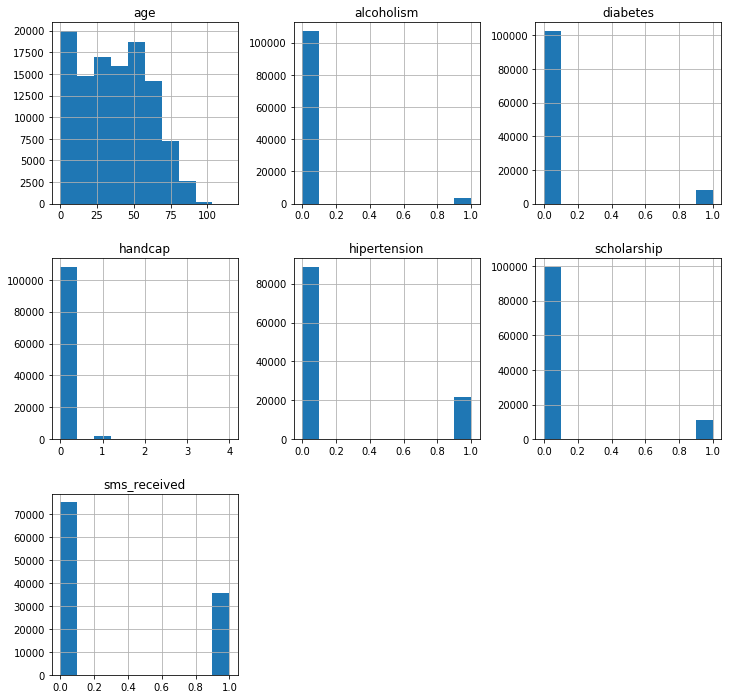

In [25]:
df_show.hist(figsize=(12,12));

In [26]:
#create a mask for the values in the show feature of the 
#df_show dataframe
show = df_show.show == 'Yes'
no_show= df_show.show == 'No'

In [27]:
# a function that masks a part of a data
#maps 1 to Yes, and 0 to No; after which it plots 
# a histogram of the data
def plot_varhist(x):
    df_show[x][show].map({1:'Yes',0:'No'}).hist(label='show', figsize=(8,8))
    df_show[x][no_show].map({1:'Yes',0:'No'}).hist(label='no_show')
    plt.xlabel(x, fontsize=13)
    plt.title('Effect of ' + x + ' on a patient\'s showing up', fontsize = 20)
    plt.ylabel('Number of patients', fontsize = 13)
    plt.legend()

In [28]:
# this function receives a column name as an argument
# gets the value_counts of that column
# then plots a bar chart of the data
def plot_val_count(x):
    var_count = df_show[x].value_counts()
    plt.bar(var_count.index[0], var_count[0], label= 'No')
    plt.bar(var_count.index[1], var_count[1], label= 'Yes')
    plt.title('Distribution of patient\'s by '+ x, fontsize=20)
    plt.xlabel(x, fontsize=13)
    plt.ylabel('Number of patient\'s', fontsize=13)
    plt.legend()

In [29]:
# perform the groupby value_counts function
# it receives two arguments
def val_count_bygroup(x,y):
    group = df_show.groupby(x)[y].value_counts()
    return group

### Research Question 1: How does being on a scholarship affect a patients showing up?

In [30]:
df_show.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

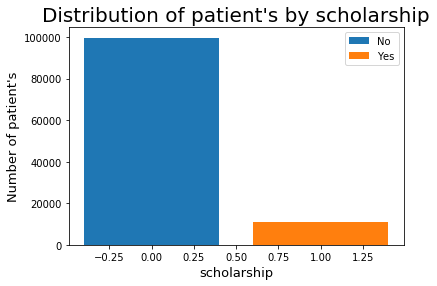

In [31]:
plot_val_count('scholarship')

###### The number of persons not on a scholarship is way smaller than that of those on a scholarship

In [32]:
val_count_bygroup('scholarship','show')

scholarship  show
0            Yes     79924
             No      19741
1            Yes      8283
             No       2578
Name: show, dtype: int64

>*ratio of people on scholarship that showed up* **8283/10861**

In [33]:
8283/10861

0.7626369579228433

>*ratio of people not on scholarship that showed up* **79924/99665**

In [34]:
79924/99665

0.8019264536196258

###### From the above
> It can be seen that a higher percentage of people not on a scholarship showed up for their appointment.

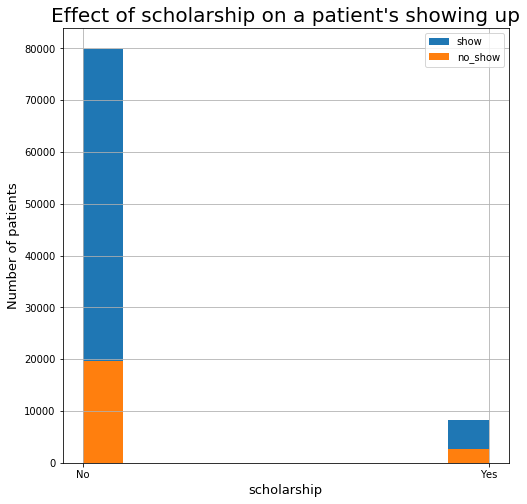

In [35]:
plot_varhist('scholarship')

######  The graph above represents the value of those on or not on a scholarship; masked with their likelihood of keeping their appointment.

> About 20,000 persons not on a scholarship didn't show up

> for those on a scholarship, the number of persons not showing up is about 2,500

### Research Question 2: How does alcohol affect showing up?

In [36]:
df_show.alcoholism.value_counts()

0    107166
1      3360
Name: alcoholism, dtype: int64

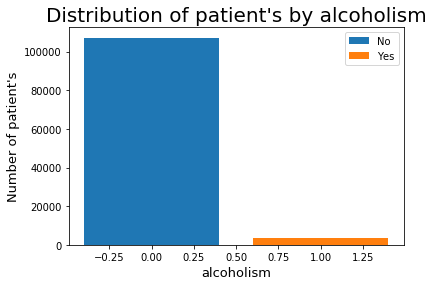

In [37]:
plot_val_count('alcoholism')

###### Only a small fraction of persons are alcoholics from this dataset

In [38]:
val_count_bygroup('alcoholism','show')

alcoholism  show
0           Yes     85524
            No      21642
1           Yes      2683
            No        677
Name: show, dtype: int64

> *ratio of non alcoholics that show up is* **85524/107166**

In [39]:
85524/107166

0.7980516208498964

>*ratio of alcoholics that show up is* **2683/3360**

In [40]:
2683/3360

0.7985119047619048

###### From the above we find that:

> about 79% of persons are likely to keep their appointment irrespective of whether they are alcoholics or not.

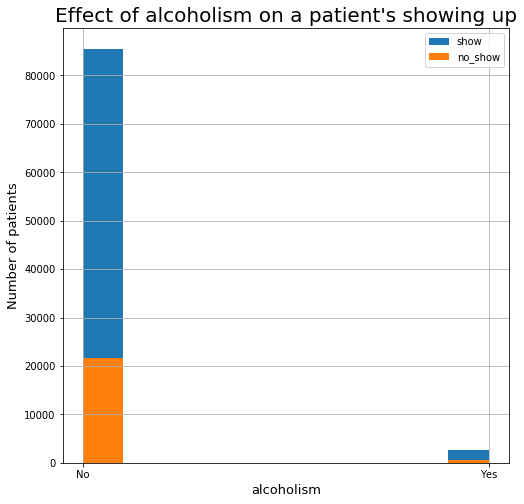

In [41]:
plot_varhist('alcoholism')

###### The graph above shows a mask of patients that show up and didn't show up for their appointment based on whether they are alcoholics or not.

> It was found that in both cases, only about 79% of persons show up for the appointment.

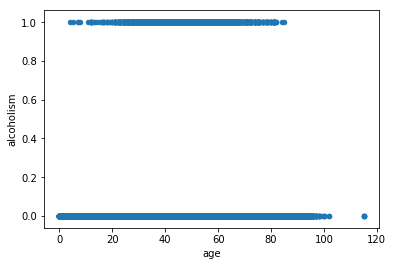

In [42]:
df_show.plot(x='age', y='alcoholism', kind='scatter')

###### The graph above tends to discover a relationship between age and alcoholism.

> No particular correlation is observed, but we can from the graph above say that once a person reaches **80 years,** the tendency for them to be an alcoholic reduces.

### What percentage of persons showed up during the whole period of the research?

In [43]:
df_show.shape

(110526, 14)

In [44]:
show_val = df_show.show.value_counts()
show_val

Yes    88207
No     22319
Name: show, dtype: int64

In [45]:
# percentage of person's that showed up and that didn't show up
# during the phase of this research
show_percent = 88207/110526
noshow_percent = 22319/110526

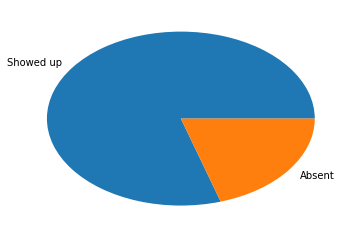

In [46]:
#a pie chart of the entire distribution
plt.pie(show_val, labels=['Showed up', 'Absent'])
plt.legend;

In [47]:
show_percent

0.7980656135208005

In [48]:
noshow_percent

0.20193438647919945

###### From the above, we see that:

> 79.8066% of persons showed up during the entire phase of the research.

> 20.1934% of persons didn't keep their appointment with the medical personnel.

### Relationship between receiving an SMS and showing up

In [49]:
df_show.sms_received.value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

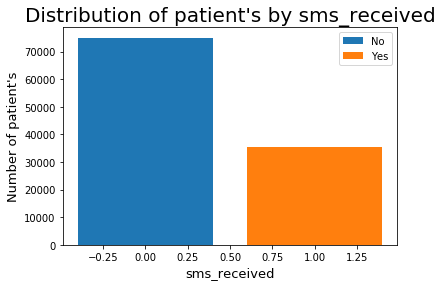

In [50]:
plot_val_count('sms_received')

###### The graph above shows us that the number of persons that didn't receive an SMS is about twice the number of those that received an SMS

In [51]:
val_count_bygroup('sms_received','show')

sms_received  show
0             Yes     62509
              No      12535
1             Yes     25698
              No       9784
Name: show, dtype: int64

In [52]:
# No SMS, but showed up
62509/75044

0.8329646607323703

In [53]:
# received SMS and showed up
25689/35482

0.7240009018657347

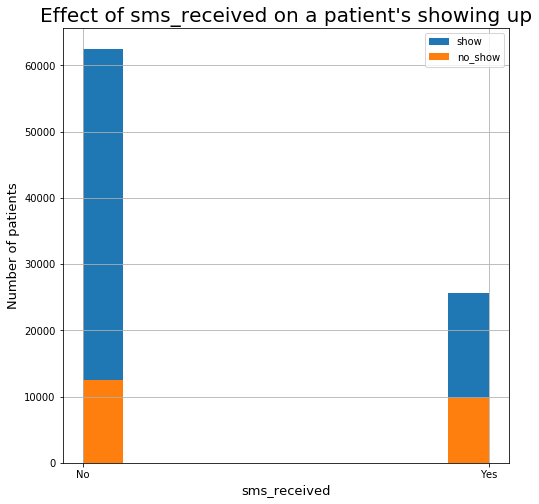

In [54]:
plot_varhist('sms_received')

###### From the above, it can be seen that
> The Percentage of persons who show up without having received an SMS is slightly higher than that of those that showed up after receiving an sms

### Effect of age on a patients showing up 

In [55]:
# create bins and labels for the age column
age_bin = [-10,20,40,60,80,100,120]
age_label = ['child','young adult','adult','old','elder','grand elder']

In [59]:
# create new column to group age into categories
df_show['age_group'] = pd.cut(df_show.age, bins=age_bin, labels=age_label)
df_show.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show,age_group
0,2.98724998243e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,old
1,5.58997776694e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,adult
2,4.26296229995e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,old
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,child
4,8.84118644818e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,adult


In [60]:
# save modifications to file as a new CSV file
#df_show.to_csv('no_show_appointments_edited', index=False)

In [61]:
age_effect = df_show.age_group.value_counts()
age_effect

child          31848
adult          30081
young adult    28835
old            16910
elder           2845
grand elder        7
Name: age_group, dtype: int64

>*The larger part of the populace under survey are people within the ages from **0-60** years i.e., children, young adults or adults*

In [62]:
val_count_bygroup('age_group', 'show')

age_group    show
child        Yes     24752
             No       7096
young adult  Yes     22209
             No       6626
adult        Yes     24490
             No       5591
old          Yes     14373
             No       2537
elder        Yes      2379
             No        466
grand elder  Yes         4
             No          3
Name: show, dtype: int64

In [63]:
val_count_bygroup(['scholarship','age_group'],'show')

scholarship  age_group    show
0            child        Yes     22072
                          No       6217
             young adult  Yes     19088
                          No       5585
             adult        Yes     22462
                          No       5017
             old          Yes     13927
                          No       2453
             elder        Yes      2371
                          No        466
             grand elder  Yes         4
                          No          3
1            child        Yes      2680
                          No        879
             young adult  Yes      3121
                          No       1041
             adult        Yes      2028
                          No        574
             old          Yes       446
                          No         84
             elder        Yes         8
Name: show, dtype: int64

> No one within the ages of 100 and 120 os on the Bolsa scholarship

In [64]:
def plot_varhist1(x):
    df_show[x][show].hist(label='show', figsize=(8,8))
    df_show[x][no_show].hist(label='no_show')
    plt.xlabel(x, fontsize=13)
    plt.title('Effect of ' + x + ' on a patient\'s showing up', fontsize = 20)
    plt.ylabel('Number of patients', fontsize = 13)
    plt.legend()

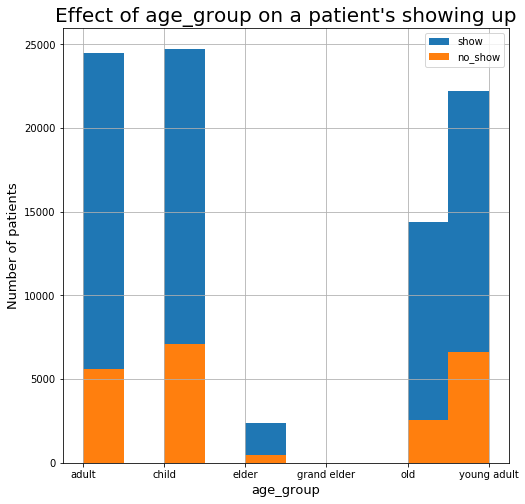

In [65]:
plot_varhist1('age_group')

###### From the above, we see that:
> The child age group occupies the bigger part of the pooulace while the grand elder group is the least in the population.

> Of the 31,848 children that make up the population, only **24,752** of them showed up.

> There are only 7 persons within the ages of 100 and 120; 4 kept their appointment, the other three didn't.

<a id='conclusions'></a>
## Conclusions

###### The research sought to find relationships between certain variables that work together to determine if a patient will show up for an appointment with their doctor or not.

*It was found that:*
> The number of persons on a scholarship is very small compared to those not on a scholarship.

> The percentage of those not on a scholarship and yet showed up is more than that of those who showed up while on a scholarship.

> No one within the ages of 100 and 120 is on a scholarship.

> Whether or not a patient is alcoholic or not doesn't really affect the chances of their showing up as **both alcoholics and non-alcoholics turned up about 79% of the time.**

> About **80%** of patients kept their appointment with the medical personnel.

> Receiving an SMS does not necessarily materialize in showing up as the percentage of persons who showed up without receiving an SMS is more than that of those who showed up after receiving an SMS.

> The larger part of the populace under survey are people within the ages of 0 and 60.

> Of the whole population under analysis, only 7 persons are within the ages of 100 and 120.

#### Limitations 

> For the fact that this project is restricted to just data analysis, one cannot be able to classify a new unlabeled data point as to whether the patient will show up or not. Doing this requires some machine learning which is beyond the scope of this project.

> Also, if data on the residential address of patients and the venue of their appointments were given, one might have been able to determine a patients keeping their appointment based on proximity to the appointment center.

###### The end.